In [2]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.vq import kmeans, vq

In [3]:
df = pd.read_csv('data/fifa_18_sample_data.csv')
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [4]:
df.shape

(1000, 185)

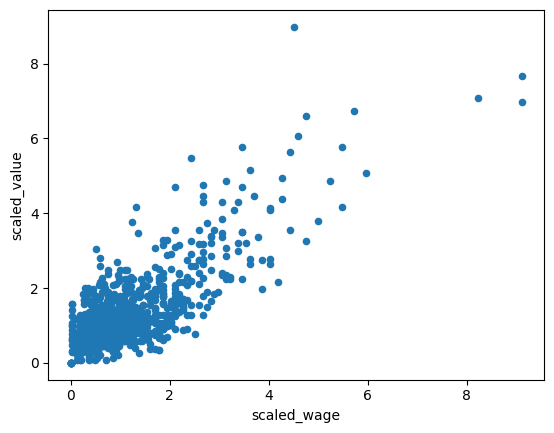

In [5]:
# Scale wage and value
df['scaled_wage'] = whiten(df['eur_wage'])
df['scaled_value'] = whiten(df['eur_value'])

# Plot the two columns in a scatter plot
df.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

In [6]:
# Check mean and standard deviation of scaled values
df[['scaled_wage', 'scaled_value']].describe()

,scaled_wage,scaled_value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064


# Exploring defenders

In [7]:
defenders = df[['sliding_tackle', 'aggression']]
defenders.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [8]:
defenders['scaled_sliding_tackle'] = whiten(defenders['sliding_tackle'])
defenders['scaled_aggression'] = whiten(defenders['aggression'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\2749805432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['scaled_sliding_tackle'] = whiten(defenders['sliding_tackle'])
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\2749805432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['scaled_aggression'] = whiten(defenders['aggression'])


In [9]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(defenders[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
defenders['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
defenders[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1361693254.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')


,scaled_sliding_tackle,scaled_aggression
cluster_labels,,
1,2.837810,4.280968
2,0.579966,1.766698
3,1.166930,3.415214


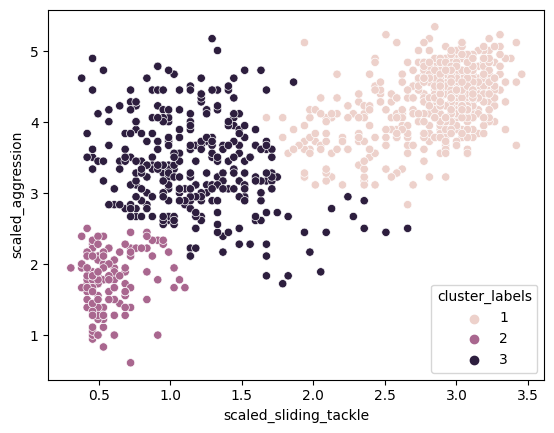

In [10]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=defenders)
plt.show()

# Exploring defenders again

In [11]:
defenders2 = df[['def', 'phy']]
defenders2.head()

,def,phy
0,33,80
1,26,61
2,30,60
3,42,81
4,60,91


In [12]:
defenders2['scaled_def'] = whiten(defenders2['def'])
defenders2['scaled_phy'] = whiten(defenders2['phy'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1691153309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders2['scaled_def'] = whiten(defenders2['def'])
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1691153309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders2['scaled_phy'] = whiten(defenders2['phy'])


In [13]:
defenders2.head()

,def,phy,scaled_def,scaled_phy
0,33,80,1.649258,9.374085
1,26,61,1.299416,7.147740
2,30,60,1.499326,7.030564
3,42,81,2.099056,9.491261
4,60,91,2.998652,10.663022


In [14]:
# Set up a random seed in numpy
random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(defenders2[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
defenders2['cluster_labels'], _ = vq(defenders2[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
defenders2[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\844814449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders2['cluster_labels'], _ = vq(defenders2[['scaled_def', 'scaled_phy']], cluster_centers)


,scaled_def,scaled_phy
cluster_labels,,
0,1.948298,7.163234
1,3.817844,9.020452
2,2.072803,9.066327


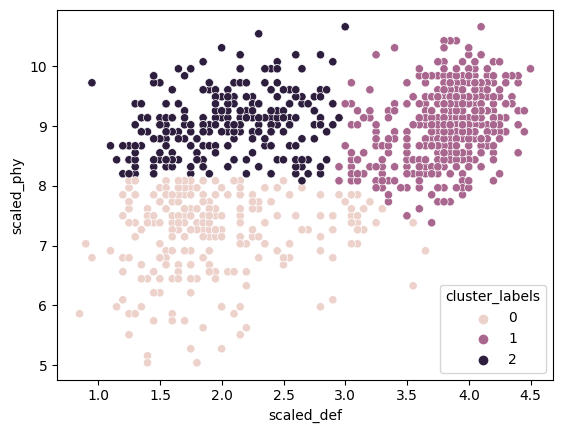

In [15]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=defenders2)
plt.show()

# Exploring attackers

In [16]:
attackers = df[['pac', 'dri', 'sho']]
attackers.head()

,pac,dri,sho
0,90,90,93
1,89,96,90
2,92,95,84
3,82,87,90
4,91,89,90


In [17]:
attackers['scaled_pac'] = whiten(attackers['pac'])
attackers['scaled_dri'] = whiten(attackers['dri'])
attackers['scaled_sho'] = whiten(attackers['sho'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\2478408695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attackers['scaled_pac'] = whiten(attackers['pac'])
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\2478408695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attackers['scaled_dri'] = whiten(attackers['dri'])
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\2478408695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [18]:
attackers.head()

,pac,dri,sho,scaled_pac,scaled_dri,scaled_sho
0,90,90,93,7.743447,9.534738,6.789714
1,89,96,90,7.657409,10.170387,6.570691
2,92,95,84,7.915524,10.064446,6.132645
3,82,87,90,7.055141,9.216914,6.570691
4,91,89,90,7.829485,9.428797,6.570691


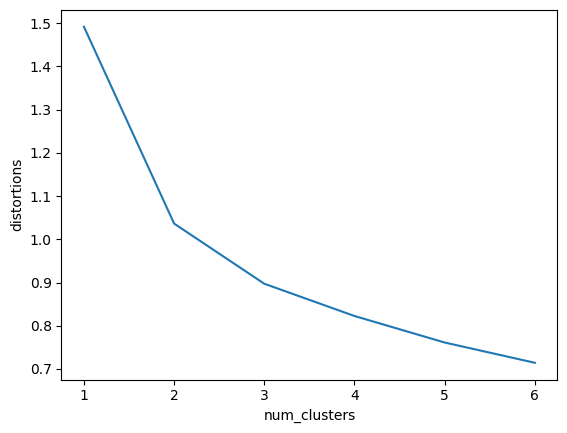

In [19]:
distortions = []
num_clusters = range(1, 7)

for i in num_clusters:
    centroids, distortion = kmeans(attackers[['scaled_pac', 'scaled_dri', 'scaled_sho']], i)
    distortions.append(distortion)
    
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)
plt.show()

In [20]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(attackers[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)

# Assign cluster labels
attackers['cluster_labels'], _ = vq(attackers[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1937114473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attackers['cluster_labels'], _ = vq(attackers[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)


In [21]:
attackers.head()

,pac,dri,sho,scaled_pac,scaled_dri,scaled_sho,cluster_labels
0,90,90,93,7.743447,9.534738,6.789714,0
1,89,96,90,7.657409,10.170387,6.570691,0
2,92,95,84,7.915524,10.064446,6.132645,0
3,82,87,90,7.055141,9.216914,6.570691,0
4,91,89,90,7.829485,9.428797,6.570691,0


In [22]:
attackers.cluster_labels.value_counts()

0    484
2    335
1    181
Name: cluster_labels, dtype: int64

In [23]:
attackers['ID'] = df.ID
attackers['eur_wage'] = df.eur_wage

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\3384875059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attackers['ID'] = df.ID
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\3384875059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attackers['eur_wage'] = df.eur_wage


In [25]:
# Print the size of the clusters
print(attackers.groupby('cluster_labels')['ID'].count())

cluster_labels
0    484
1    181
2    335
Name: ID, dtype: int64


In [26]:
# Print the mean value of wages in each cluster
print(attackers.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    75809.917355
1    62193.370166
2    64128.358209
Name: eur_wage, dtype: float64


# Exploring overall player level

In [27]:
level = df[['pac', 'sho', 'pas', 'dri', 'def', 'phy']]
level.head()

,pac,sho,pas,dri,def,phy
0,90,93,82,90,33,80
1,89,90,86,96,26,61
2,92,84,79,95,30,60
3,82,90,79,87,42,81
4,91,90,95,89,60,91


In [29]:
level['scaled_pac'] = whiten(df.pac)
level['scaled_sho'] = whiten(df.sho)
level['scaled_pas'] = whiten(df.pas)
level['scaled_dri'] = whiten(df.dri)
level['scaled_def'] = whiten(df['def'])
level['scaled_phy'] = whiten(df.phy)

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1399001209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level['scaled_pac'] = whiten(df.pac)
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1399001209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level['scaled_sho'] = whiten(df.sho)
C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1399001209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [30]:
level.head()

,pac,sho,pas,dri,def,phy,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
0,90,93,82,90,33,80,7.743447,6.789714,9.291969,9.534738,1.649258,9.374085
1,89,90,86,96,26,61,7.657409,6.570691,9.745236,10.170387,1.299416,7.147740
2,92,84,79,95,30,60,7.915524,6.132645,8.952019,10.064446,1.499326,7.030564
3,82,90,79,87,42,81,7.055141,6.570691,8.952019,9.216914,2.099056,9.491261
4,91,90,95,89,60,91,7.829485,6.570691,10.765086,9.428797,2.998652,10.663022


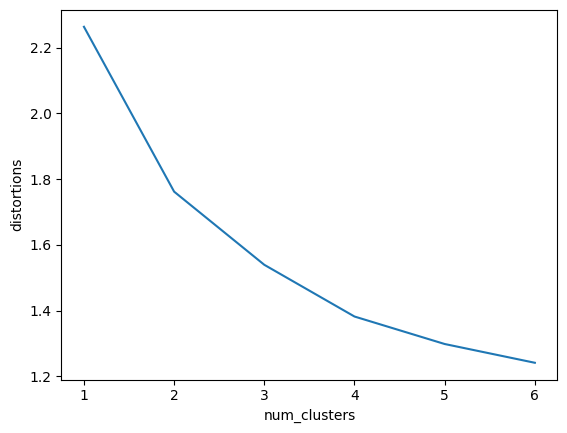

In [32]:
distortions = []
num_clusters = range(1, 7)

for i in num_clusters:
    centroids, distortion = kmeans(level[['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 
                                              'scaled_def', 'scaled_phy']], i)
    distortions.append(distortion)
    
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)
plt.show()

In [33]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(level[['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 
                                  'scaled_def', 'scaled_phy']], 2)

# Assign cluster labels and print cluster centers
level['cluster_labels'], _ = vq(level[['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 
                                       'scaled_def', 'scaled_phy']], cluster_centers)

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\3668524376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level['cluster_labels'], _ = vq(level[['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri',


In [34]:
level.groupby('cluster_labels')[['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 
                                 'scaled_def', 'scaled_phy']].mean()

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
cluster_labels,,,,,,
0,5.454041,3.668379,7.174064,6.767575,3.966702,9.209874
1,6.684070,5.430915,8.455704,8.514977,2.500552,8.334066


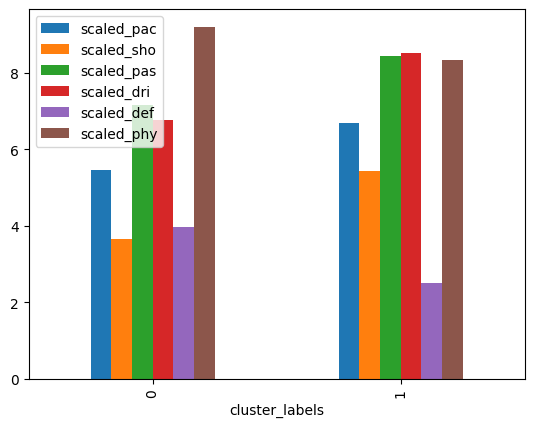

In [35]:
# Plot cluster centers to visualize clusters
level.groupby('cluster_labels')[['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 
                                 'scaled_def', 'scaled_phy']].mean().plot(legend=True, kind='bar')
plt.show()

In [36]:
level['name'] = df.name

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\2694150789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level['name'] = df.name


In [37]:
level.head()

,pac,sho,pas,dri,def,phy,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy,cluster_labels,name
0,90,93,82,90,33,80,7.743447,6.789714,9.291969,9.534738,1.649258,9.374085,1,Cristiano Ronaldo
1,89,90,86,96,26,61,7.657409,6.570691,9.745236,10.170387,1.299416,7.147740,1,L. Messi
2,92,84,79,95,30,60,7.915524,6.132645,8.952019,10.064446,1.499326,7.030564,1,Neymar
3,82,90,79,87,42,81,7.055141,6.570691,8.952019,9.216914,2.099056,9.491261,1,L. Suárez
4,91,90,95,89,60,91,7.829485,6.570691,10.765086,9.428797,2.998652,10.663022,1,M. Neuer


In [38]:
# Get the name column of first 5 players in each cluster
for cluster in level['cluster_labels'].unique():
    print(cluster, level[level['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']
